Import `pandas` and read data file from GitHub

In [1]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/nkfreeman/Fall_23_PFD_Workshop/main/churn/churn.csv')

Print first five rows of `data` object using `head` method.

In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the `type` of the `data` object, which shows it is a `DataFrame`.

In [3]:
type(data)

pandas.core.frame.DataFrame

`pandas` objects have a `shape` attribute that describes the shape (rows and columns for a `DataFrame`). The following code block uses the `shape` attribute to show that our data has 7,043 rows and 21 columns.

In [4]:
data.shape

(7043, 21)

Select one row of the `data` object (the second row, which is index position 1).

In [5]:
data.loc[1, :]

customerID            5575-GNVDE
gender                      Male
SeniorCitizen                  0
Partner                       No
Dependents                    No
tenure                        34
PhoneService                 Yes
MultipleLines                 No
InternetService              DSL
OnlineSecurity               Yes
OnlineBackup                  No
DeviceProtection             Yes
TechSupport                   No
StreamingTV                   No
StreamingMovies               No
Contract                One year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             56.95
TotalCharges              1889.5
Churn                         No
Name: 1, dtype: object

Note that the type of the object returned when we select a single row is a `Series`.

In [6]:
type(data.loc[1, :])

pandas.core.series.Series

Select one column of the `data` object.

In [7]:
data.loc[:, 'customerID']

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

As was the case when we selected a single row, the returned object when we select a column is a `Series`.

In [8]:
type(data.loc[:, 'customerID'])

pandas.core.series.Series

You can also get a column of a `pandas` `DataFrame` by simply appending the desired column in brackets at the end of the `DataFrame` object's name.

In [9]:
data['customerID']

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

We can select multiple columns (or rows) by providing more than one valid option in a `list`.

In [10]:
data.loc[:, ['customerID', 'gender']]

,customerID,gender
0,7590-VHVEG,Female
1,5575-GNVDE,Male
2,3668-QPYBK,Male
3,7795-CFOCW,Male
4,9237-HQITU,Female
...,...,...
7038,6840-RESVB,Male
7039,2234-XADUH,Female
7040,4801-JZAZL,Female
7041,8361-LTMKD,Male


When we select multiple columns(rows), the returned object is a `DataFrame`.

In [11]:
type(data.loc[:, ['customerID', 'gender']])

pandas.core.frame.DataFrame

We can use *comparison operators* to conduct comparisons across all rows of a `DataFrame`.

In [12]:
gender_mask = (data['gender'] == 'Male')
gender_mask

0       False
1        True
2        True
3        True
4       False
        ...  
7038     True
7039    False
7040    False
7041     True
7042     True
Name: gender, Length: 7043, dtype: bool

We can then use such a *mask* to filter the `DataFrame`.

In [13]:
data[gender_mask]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Multiple masks can be combined using the **&** (and) and **|** (or) operators. The following code block returns the data for all entries corresponding to males that are senior citizens.

In [14]:
gender_mask = (data['gender'] == 'Male')
senior_citizen_mask = (data['SeniorCitizen'] == 1)
male_senior_mask = gender_mask & senior_citizen_mask
data[male_senior_mask]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7015,0666-UXTJO,Male,1,Yes,No,34,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.20,2874.45,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


The following code block returns the data for all entries corresponding to males **or** senior citizens.

In [15]:
gender_mask = (data['gender'] == 'Male')
senior_citizen_mask = (data['SeniorCitizen'] == 1)
male_or_senior_mask = gender_mask | senior_citizen_mask
data[male_or_senior_mask]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The following code block shows how we can use the `groupby` functionality of a `pandas` `DataFrame` object. Specifically, we use this functionality to count the number of customers that use each type of `InternetService` that is represented in our data. There are actually a few ways of doing this. The method shown below returns a `Series`.

In [16]:
data.groupby('InternetService')['customerID'].nunique()

InternetService
DSL            2421
Fiber optic    3096
No             1526
Name: customerID, dtype: int64

The following code block shows a second way of doing this that returns a `DataFrame`. Note that the name of the column containing the counts is the same as the name of the column we used to compute the counts. This can sometimes be confusing.

In [17]:
data.groupby('InternetService').agg({'customerID': 'nunique'})

,customerID
InternetService,
DSL,2421
Fiber optic,3096
No,1526


The following code block shows a third way of doing the aggregation that also returns a `DataFrame`. With this method, we explicitly define the name of the count column.

In [18]:
data.groupby('InternetService').agg(
    n_customers = ('customerID', 'nunique')
)

,n_customers
InternetService,
DSL,2421
Fiber optic,3096
No,1526


The following code block demonstrates basic usage of the `plot` method for a `pandas` `DataFrame`. Specifically, we use this method to generate a barplot for the distribution of customers by `InternetService`.

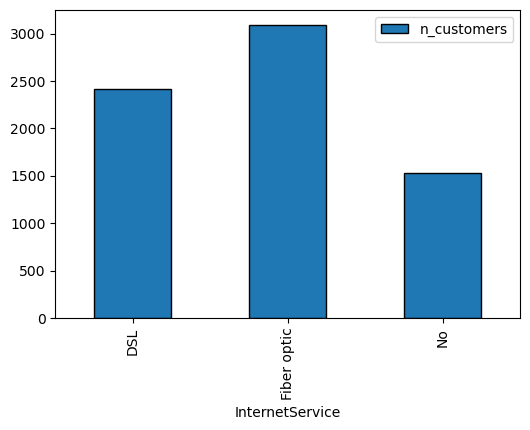

In [19]:
internet_service_distribution = data.groupby('InternetService').agg(
    n_customers = ('customerID', 'nunique')
)

internet_service_distribution.plot(
    kind='bar',
    figsize=(6, 4),
    edgecolor='k',
);

The following code block uses the things we have seen thusfar to create a simple loop that plots the distribution of customers for all columns with less than 8 unique options represented in the columns.

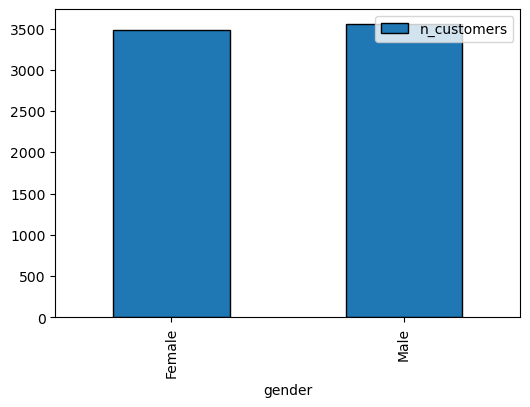

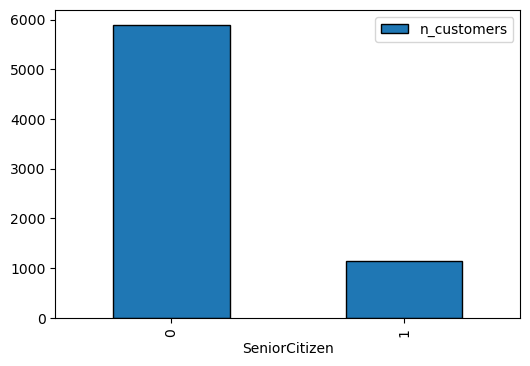

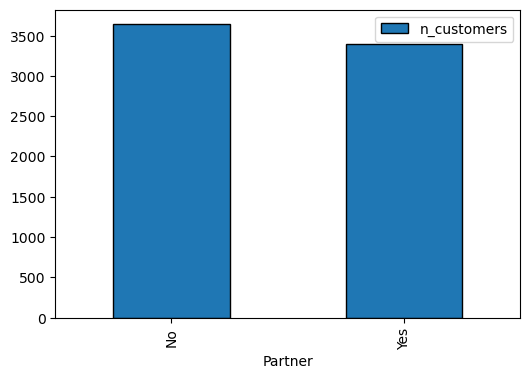

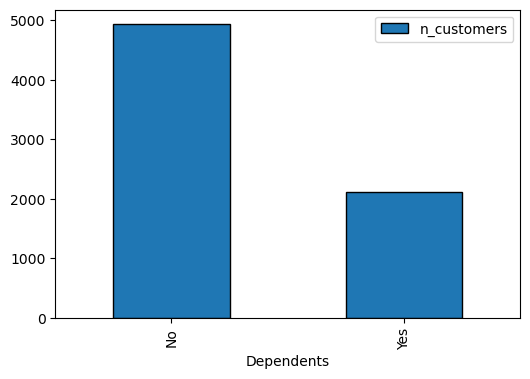

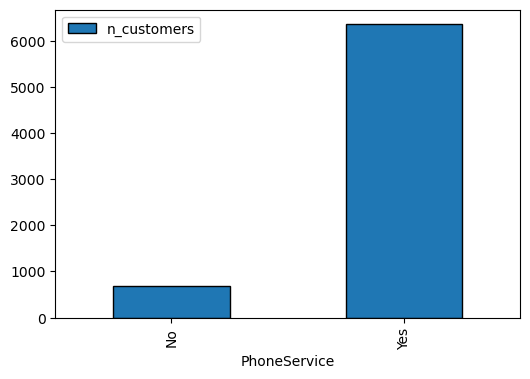

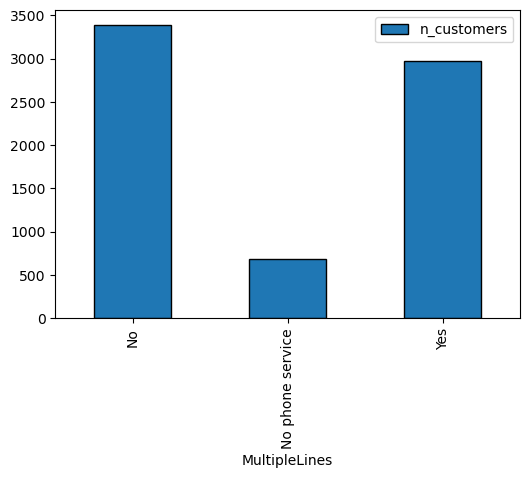

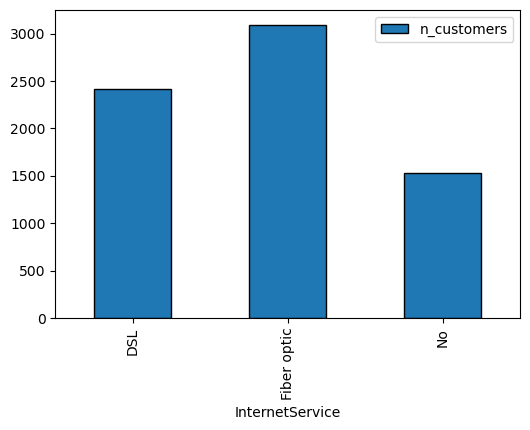

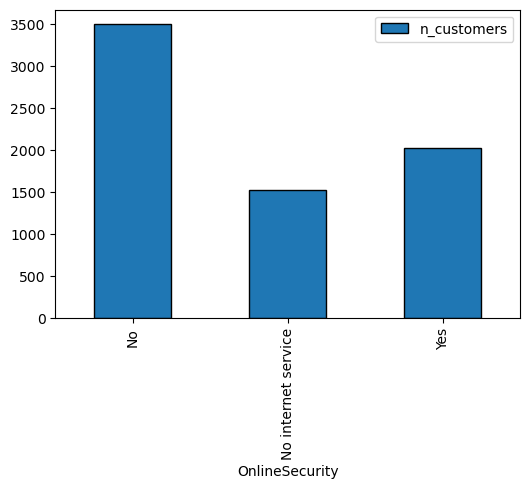

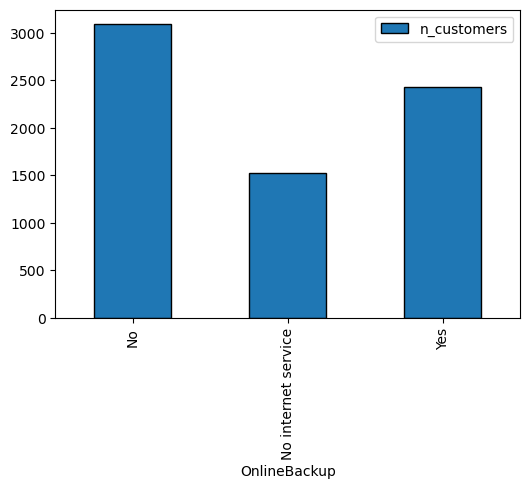

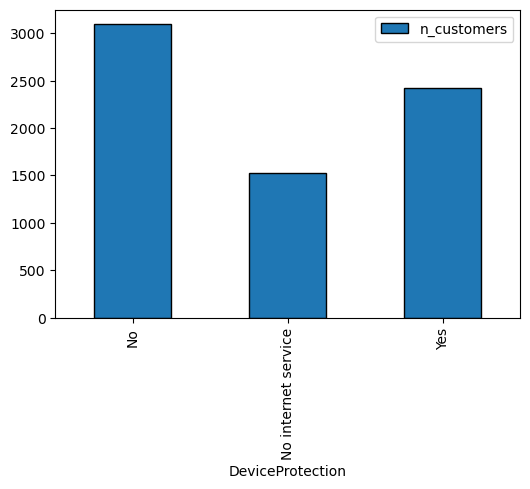

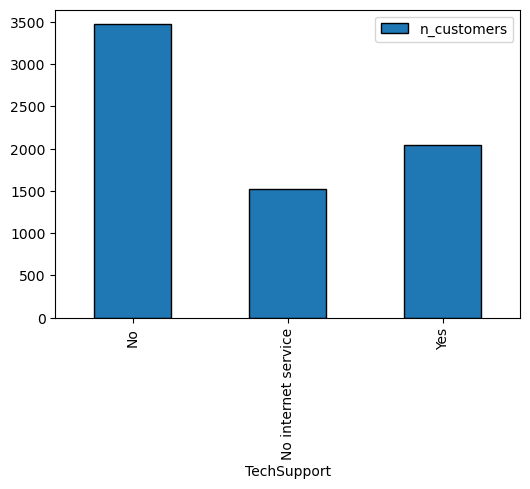

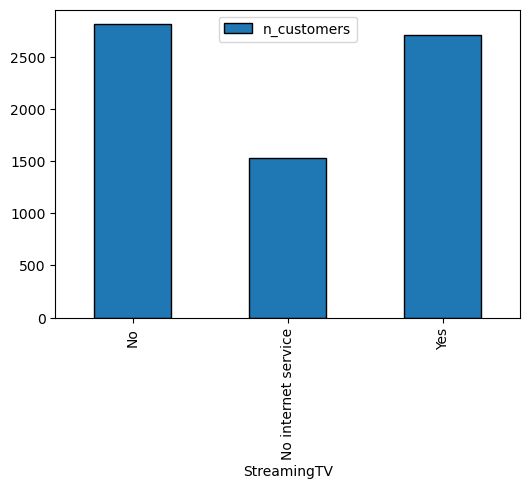

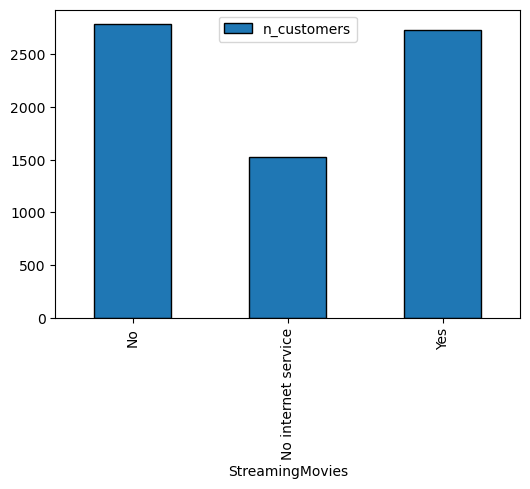

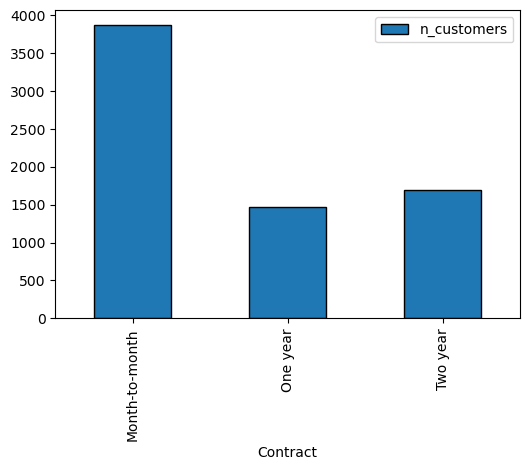

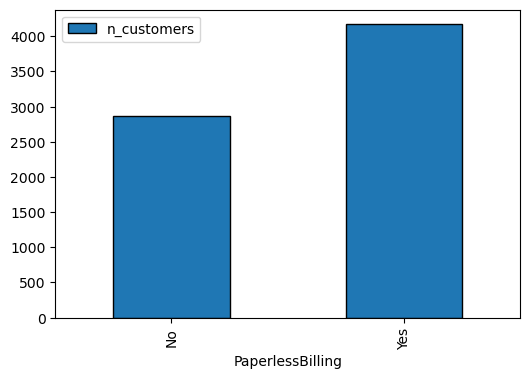

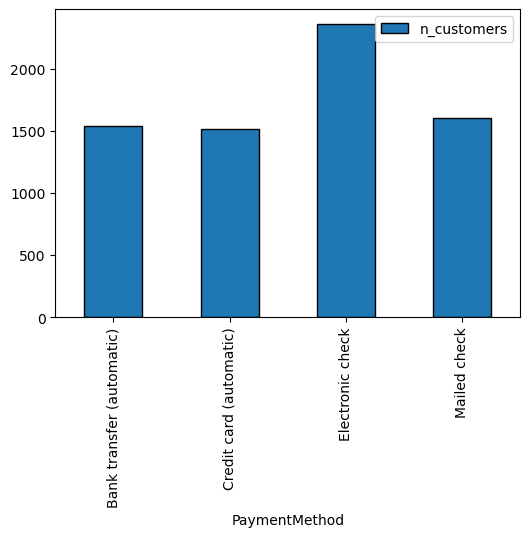

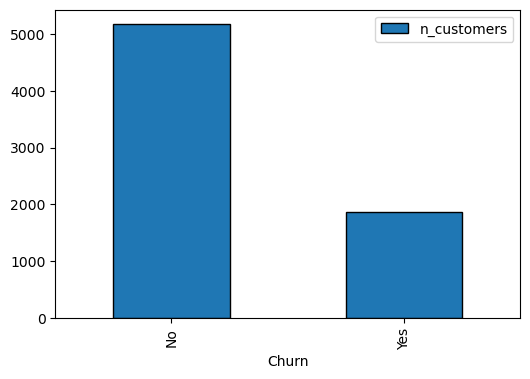

In [20]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/nkfreeman/Fall_23_PFD_Workshop/main/churn/churn.csv')

for col in data.columns:
    if data[col].nunique() < 8:
        temp = data.groupby(col).agg(
            n_customers = ('customerID', 'nunique')
        )
        temp.plot(
            kind='bar',
            figsize=(6, 4),
            edgecolor='k',
        )